# Stationarity

[Stationarity](https://en.wikipedia.org/wiki/Stationary_process) is one of the most important properties of time series.

But what does it mean for data to be stationary?

If a time series is **stationary**, that means it does **not change its statistical properties over time**, namely its mean and variance. (The constancy of variance is called [homoscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity)). Also, it should not contain seasonality. We can then summarize the 3 main characteristics as follows:
- Constant mean
- Constant variance
- No seasonality

We can easily see these features visually on the below images:

- The time series below is not stationary because the mean increases over time (i.e., it is a function of time).

<div style="text-align: center; line-height: 0; padding-top: 2px;">
  <img src="images/non-stationary1.png" alt="Mean non stationary" style="width: 800px; height: 250px">
</div>

- The time series is not stationary because the variance changes over time (i.e., it is a function of time). Notice the varying spread of data over time.

<div style="text-align: center; line-height: 0; padding-top: 2px;">
  <img src="images/non-stationary2.png" alt="Variance non stationary" style="width: 800px; height: 250px">
</div>

- Finally, a stationary time series does not have seasonality. In the following graph, you can notice clear cycles over time. Hence, this time series contains seasonality and it is non-stationary.

<div style="text-align: center; line-height: 0; padding-top: 2px;">
  <img src="images/non-stationary3.png" alt="Covariance non stationary" style="width: 800px; height: 250px">
</div>

#### Why is this important? 

When running a linear regression the assumption is that all of the observations are all independent of each other. In a time series, however, we know that observations are time dependent. It turns out that a lot of nice results that hold for independent random variables (law of large numbers and central limit theorem to name a couple) hold for stationary random variables. So by making the data stationary, statistical time series methods and even modern machine learning methods will benefit from the clearer signal in the data.

**If you have clear trend and seasonality in your time series, then model these components, remove them from observations, then train models on the residuals.**

Let's import the libraries we need. First, we will need the [statsmodels](http://statsmodels.sourceforge.net/stable/) library, which has many statistical modeling functions, including time series.

In [1]:
import warnings                                  # `do not disturbe` mode
warnings.filterwarnings('ignore')

import math
import numpy as np                               
import pandas as pd                              
import matplotlib.pyplot as plt               
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss

%matplotlib inline

### White noise

First let’s look at a white noise series. White noise is the prototypical stationary series. It has a constant mean, constant variance, and there’s no autocorrelation structure at all. Here’s some white noise:

In [2]:
# create series

mean = 0
std = 1 
num_samples = 1000
samples = np.random.normal(mean, std, size=num_samples)
ts = range(0,num_samples)

In [3]:
# build dataframe

df = pd.DataFrame(columns = ['ts', 'values'])
df['values'] = pd.Series(samples)
df['ts'] = pd.Series(ts)

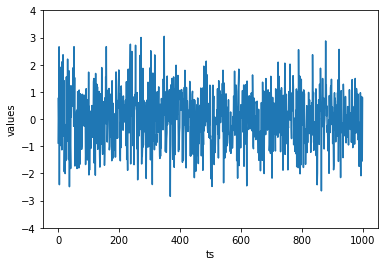

In [4]:
# plotting

ax = plt.gca()
sns.lineplot(x="ts", y="values", data=df)
ax.set(ylim=(-4, 4))
plt.show()

The process generated by the standard normal distribution is stationary and oscillates around 0 with with deviation of 1. Now, based on this process, we will generate a new one with the non-stationary behaviours.

Here is the code to render the plots.

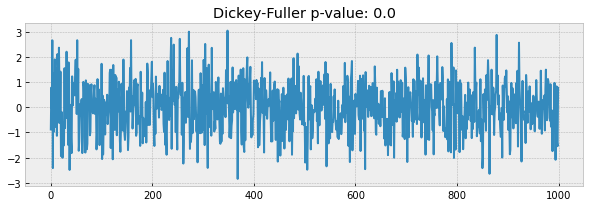

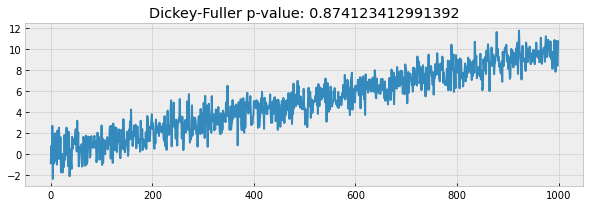

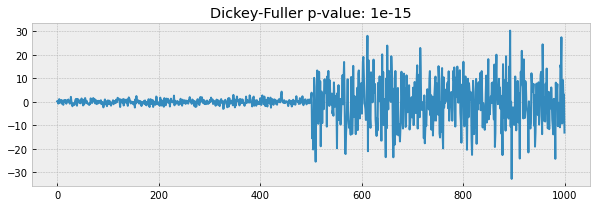

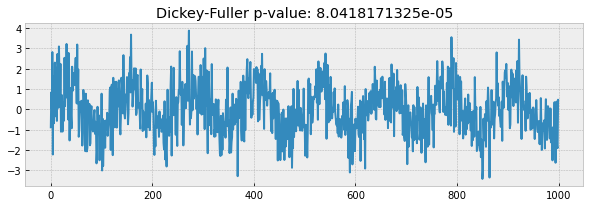

In [5]:
def plot_non_stationary(x):
    with plt.style.context('bmh'):  
        plt.figure(figsize=(10, 3))
        plt.plot(x)
        plt.title("Dickey-Fuller p-value: {}".format(round(adfuller(x)[1], 15)))

# white noise
plot_non_stationary(samples)

# change the mean
df_non_costant_mean = df.copy()
df_non_costant_mean['values'] = df_non_costant_mean['values']+df_non_costant_mean['ts']/100
plot_non_stationary(df_non_costant_mean[['values']].values.flatten())

first_half_samples = np.random.normal(mean, std, size=int(num_samples/2))
second_half_samples = np.random.normal(mean, std*10, size=int(num_samples/2))
samples_non_constant_variance = np.concatenate([first_half_samples, second_half_samples])
plot_non_stationary(samples_non_constant_variance)

df_withseason = df.copy()
df_withseason['values'] = df_withseason['values'] + (df_withseason['ts']/20).apply(math.sin)
plot_non_stationary(df_withseason[['values']].values.flatten())

On the first plot, we can see the same stationary white noise as before. In the following three plots there are 3 basic examples of non-stationary time series. Look at how the statistics of the samples change over time, and also pay attention to the range of values and to the p-value of the Dickey-Fuller Statistical test.

 ## Checks for Stationarity

There are many methods to check whether a time series (direct observations, residuals, otherwise) is stationary or non-stationary.

- **Look at Plots**: You can review a time series plot of your data and visually check if there are any obvious trends or seasonality.
- **Summary Statistics over time**: You can review the summary statistics for your data for seasons or random partitions and check for obvious or significant differences.
- **Statistical Tests**: You can use statistical tests to check if the expectations of stationarity are met or have been violated.

Let's see an example using the Airline Passengers dataset:

In [6]:
# import data
data_set = pd.read_csv('data/airline_passengers.csv',infer_datetime_format=True,parse_dates=["Month"],index_col=["Month"])

### Look at Plots

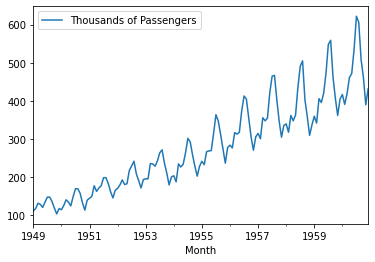

In [7]:
# visualize data
data_set.plot()
plt.show()

In this case it is evident that the time series is non-stationary. Indeed, the plot already shows an obvious presence of trend and seasonality components. 

### Summary Statistics over time

A quick wat to see if the time series is non-stationary is to review summary statistics. You can split your time series into two (or more) partitions and compare the mean and variance of each group. If they differ and the difference is statistically significant, the time series is likely non-stationary.

In [8]:
X = data_set.values.flatten()
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1 = %f, mean2 = %f' % (mean1, mean2))
print('variance1 = %f, variance2 = %f' % (var1, var2))

mean1 = 182.902778, mean2 = 377.694444
variance1 = 2244.087770, variance2 = 7367.962191


Running the example, we can see the mean and variance look very different. We should have a non-stationary time series.

Because we want to look at the mean and variance, we are assuming that the data conforms to a Gaussian (also called the bell curve or normal) distribution. So, we can also double-check this by eyeballing a histogram of our observations to see if assuming a Gaussian distribution makes sense in this case by plotting the values of the time series as a histogram.

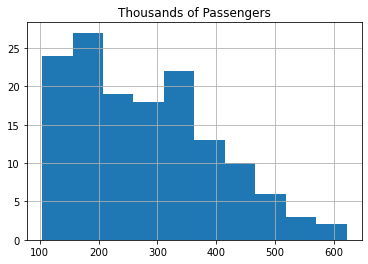

In [9]:
data_set.hist()
plt.show()

The distribution is far from a Gaussian one. We can also try to see the histogram of the 2 partitions of the time series to see how much they are different.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3f9d4c350>]],
      dtype=object)

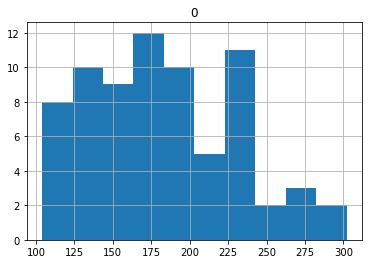

In [10]:
pd.DataFrame(X1).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3f9dc5d50>]],
      dtype=object)

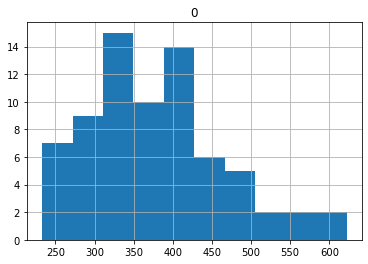

In [11]:
pd.DataFrame(X2).hist()

Running the example shows that indeed the distribution of values does not look like a Gaussian, therefore the mean and variance values are less meaningful.

This squashed distribution of the observations may be another indicator of a non-stationary time series.

Reviewing the plot of the time series again, we can see that there is an obvious seasonality component, and it looks like the seasonality component is growing.

This may suggest an exponential growth from season to season. A log transform can be used to flatten out exponential change back to a linear relationship.

Below is the same histogram with a log transform of the time series.

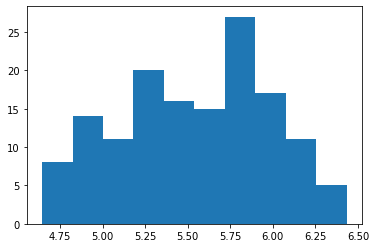

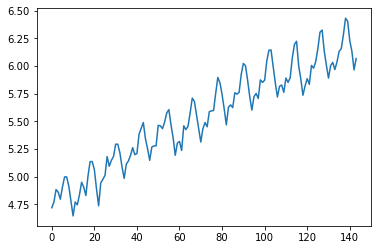

In [12]:
X_log = np.log(X)
plt.hist(X_log)
plt.show()
plt.plot(X_log)
plt.show()

If we try now to plot the histogram of the 2 partitions of the log-transformed time series, we will see that the distributions of the partitions are much more similar.

In [13]:
X1_log, X2_log = X_log[0:split], X_log[split:]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff42a4f5e10>]],
      dtype=object)

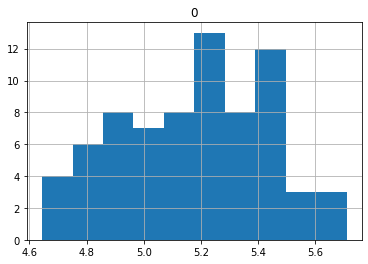

In [14]:
pd.DataFrame(X1_log).hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff3fa1a7d50>]],
      dtype=object)

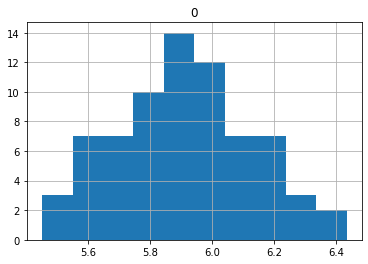

In [15]:
pd.DataFrame(X2_log).hist()

### Statistical Tests

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be rejected or fail to be reject. The result must be interpreted for a given problem to be meaningful.

Nevertheless, they can provide a quick check and confirmatory evidence that your time series is stationary or non-stationary.

The [Augmented Dickey-Fuller](https://en.wikipedia.org/wiki/Augmented_Dickey%E2%80%93Fuller_test) test is a type of statistical test called a [unit root test](https://en.wikipedia.org/wiki/Unit_root_test). There are a number of unit root tests and the Augmented Dickey-Fuller is one of the more widely used. It uses an autoregressive model and optimizes an information criterion across multiple different lag values.

#### What is a unit root

**A unit root in a time series implies unpredictability** because it is associated with non-stationarity, and non-stationary data often exhibits erratic and unpredictable behavior. This makes it difficult to make reliable predictions about the future behavior of a time series with a unit root. Here's why a unit root leads to unpredictability:

- *Non-Stationarity*: A unit root suggests that a time series variable has a trend component, and its statistical properties (such as mean and variance) do not remain constant over time. In other words, the data does not have a fixed, stable level. This lack of stationarity means that the data can exhibit irregular and unpredictable patterns.
- *Persistence of Shocks*: When a time series has a unit root, it is susceptible to "shocks" or unexpected changes that can have a lasting impact. For example, if there's an unexpected increase or decrease in a variable's value, the unit root implies that the variable may not revert to a stable level. Instead, the shock can lead to persistent deviations, making it difficult to predict when the variable will return to its initial state.
- *Cumulative Effects*: Unit root processes can accumulate changes over time. This means that past values of the variable can continue to influence future values. As a result, the variable's path can be affected by its historical behavior, making it challenging to forecast its future values.

#### Interpreting the ADF test results

The null hypothesis of the test is that the time series can be represented by a unit root, that it is not stationary (has some time-dependent structure). The alternate hypothesis (rejecting the null hypothesis) is that the time series is stationary.

- **Null Hypothesis (H0)**: If failed to be rejected, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.
- **Alternate Hypothesis (H1)**: The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure.

We interpret this result using the p-value from the test. A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we fail to reject the null hypothesis (non-stationary).

- **p-value > 0.05**: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
- **p-value <= 0.05**: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

Let's see an example of computing the Augmented Dickey-Fuller test on the Airline Passenger dataset. The statsmodels library provides the [adfuller()](http://statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html) function that implements the test.

In [16]:
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.815369
p-value: 0.991880
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


The test statistic is positive, meaning we are much less likely to reject the null hypothesis (it looks non-stationary).

Comparing the test statistic to the critical values, it looks like we would have to fail to reject the null hypothesis that the time series is non-stationary and does have time-dependent structure.

There exist multiple statistical tests which we can rely on. The most used are:
- Augmented Dickey-Fuller (ADF)
- Kwiatkowski-Phillips-Schmidt-Shin (KPSS)
- Osborn-Chui-Smith-Birchenhall (OCSB) for seasonal differencing
- Canova-Hansen (CH) for seasonal differencing

Notably, the Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test figures out if a time series is stationary around a mean or linear trend.

- the null hypothesis for the test is that the data is stationary.
- the alternate hypothesis for the test is that the data is not stationary.

In [17]:
result = kpss(X)
print('KPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[3].items():
    print('\t%s: %.3f' % (key, value))

KPSS Statistic: 1.052175
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739


/Users/giacomo/miniforge3/envs/timeseries/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


#### Interpreting the KPSS test results

If the KPSS statistic is greater than the critical value (given in the table above for alpha levels of 10%, 5% and 1%), then the null hypothesis is rejected; the series is non-stationary. In this case, we are able to reject the null hypothesis, obtaining the same conclusion coming from the ADF test, i.e., the Airline Passengers data is non-stationary.

### What to do when ADF and KPSS tests output opposite results

With this dataset the output was clear due to high level of non-stationarity of the data. However, be aware that it is not uncommon for the two tests (ADF and KPSS) to get two opposite results, with one finding that the time series is stationary, and the other finding that it is not stationary. As a rule of thumb, if they agree you can be quite confident that time series is definitely stationary or non-stationary (depending on the results). When the two tests contradict each other, this is most often due to the assumptions they make about the data, and so if at least one of the tests says it is not stationary, it is very likely that some form of differentiation or de-trending is needed. 

- If the ADF test finds data stationary, but the KPSS test does not, the series is "difference-stationary": it still requires differencing (a technique to remove trend, further details in following parts).
- If the KPSS test finds data stationary, but the ADF test does not, the series is "trend-stationary": it requires differencing (or other transformations such as de-trending) to remove the trend.

For a comprehensive example, see [here](https://towardsdatascience.com/when-a-time-series-only-quacks-like-a-duck-10de9e165e).

### Once we detected the data is non-stationary, how can we extract a stationary component from it???

We can fight non-stationarity using different approaches: various order differences, trend and seasonality removal, smoothing, and transformations like Box-Cox or logarithmic. All of these methods are strictly related to the **decomposition** phase, that allows us to obtain the various components, e.g., trend, seasonality, etc., in order to then train our model only on the stationary (we hope!) residuals.

#### Reference material

- [Seasonal ARIMA with Python](http://www.seanabu.com/2016/03/22/time-series-seasonal-ARIMA-model-in-python/)
- [How to Check if Time Series Data is Stationary with Python](https://machinelearningmastery.com/time-series-data-stationary-python/)